In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### <div style="padding: 35px;color:Black;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.definition.org/wp-content/uploads/2018/04/Titanic_11.jpg)"><b><span style='color:#404040'>Titanic data 🚢🌊 Getting Started.. </span></b> </div>

<br>

<p style="text-align:center; ">
<img src="https://cf.ltkcdn.net/kids/images/std/236793-1600x1200-titanic.jpg" style='width: 500px; height: 350px;'>
</p>

<br>

### <b><span style='color:#0077b3'>|</span> Domain Knowledge</b>

<br>

* `survival`: Target column has two values (0 = No, 1 = Yes).
* `pclass`:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `sex`: male or female.
* `Age`: Age of passengers in years.	
* `sibsp`: number of siblings / spouses aboard the Titanic.	
* `parch`: number of parents / children aboard the Titanic.
* `ticket`:	Ticket number.
* `fare`: Passenger fare.
* `cabin`: Cabin number.	
* `embarked`: Port of Embarkation has three values (C = Cherbourg, Q = Queenstown, S = Southampton)   

         
   

# <a id="1"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>0 | Introduction </span></b> </div>

## <b>I <span style='color:#595959'>|</span> Import libraries and dataset</b> 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [65]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <b><span style='color:#595959'>|</span> Observations </b> 

* The training-set has 891 rows and 11 features + `survived` column (target feature).
<br>

* `Categorical` columns: Survived, Sex, and Embarked. `Ordinal` columns: Pclass.

* `Continous` columns: Age, Fare. `Discrete` columns: SibSp, Parch.

* `alphanumeric` columns: Ticket and Cabin.

* The passenger ages range from 0.4 to 80.

* There are three columns in our data have missing values: 
    * `Cabin` column have almost `77%` null values of its data. we might want to drop it.
    * 177 value in `Age` column are missed, Around `19%` of its data.
    * Just two values in `Embarked` are missing, which can easily be filled.
<br>


* `SibSp` and `Parch` These features have zero correlation for certain values. We might derive a feature or a set of features from these individual features. 


# <a id="3"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>2 | Explore data analysis </span></b> </div>

<br>

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1-  Univariative Analysis </mark>**

<br>

### Analysis on categorical column


In [68]:
def add_bar_labels(ax, spacing=5):
     for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, xytext=(0, spacing),
                    textcoords='offset points')

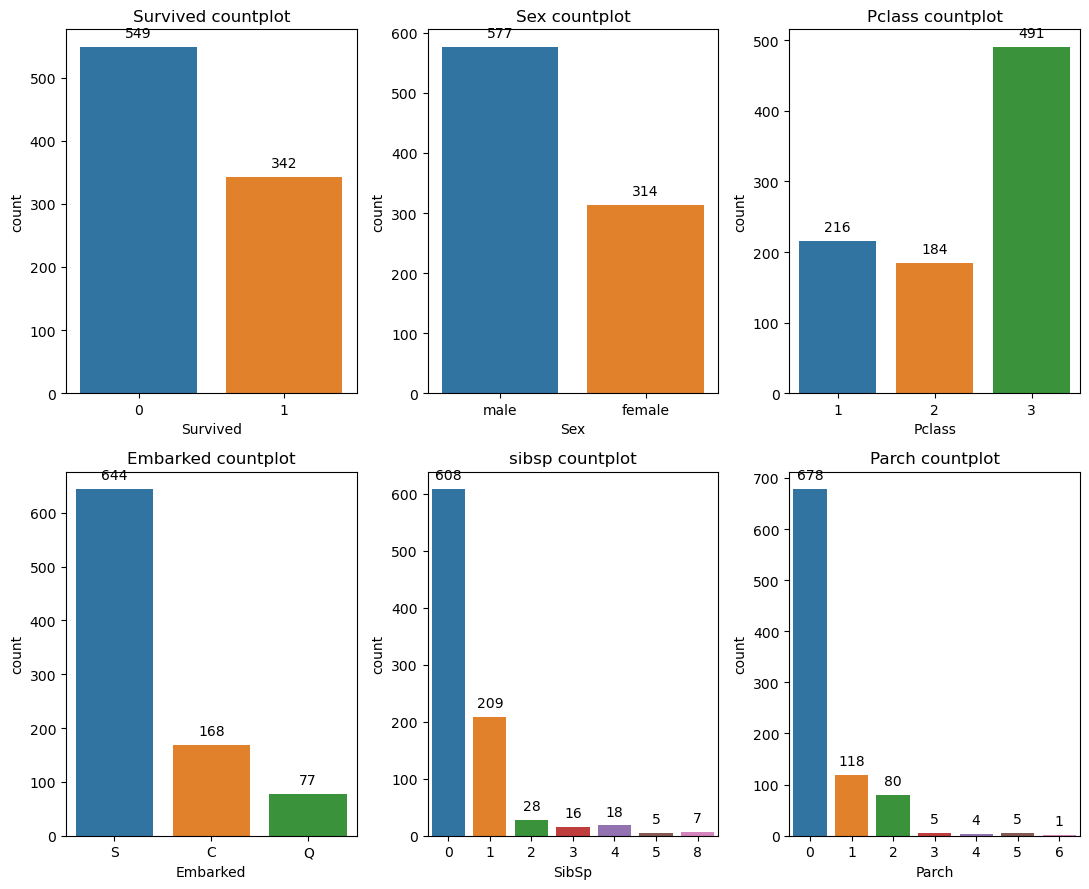

In [69]:
plt.figure(figsize = (11,9))
plt.subplot(2,3,1)
plt.title('Survived countplot')
ax = sns.countplot(data = titanic_df,x='Survived')
add_bar_labels(ax) 

plt.subplot(2,3,2)
plt.title('Sex countplot')
ax = sns.countplot(data = titanic_df,x='Sex')
add_bar_labels(ax)

plt.subplot(2,3,3)
plt.title('Pclass countplot')
ax = sns.countplot(data = titanic_df,x='Pclass')
add_bar_labels(ax)

plt.subplot(2,3,4)
plt.title('Embarked countplot')
ax = sns.countplot(data = titanic_df,x='Embarked')
add_bar_labels(ax)

plt.subplot(2,3,5)
plt.title('sibsp countplot')
ax = sns.countplot(data = titanic_df,x='SibSp')
add_bar_labels(ax)

plt.subplot(2,3,6)
plt.title('Parch countplot')
ax = sns.countplot(data = titanic_df,x='Parch')
add_bar_labels(ax)

plt.tight_layout()

### Analysis on numerical column

<Axes: ylabel='Fare'>

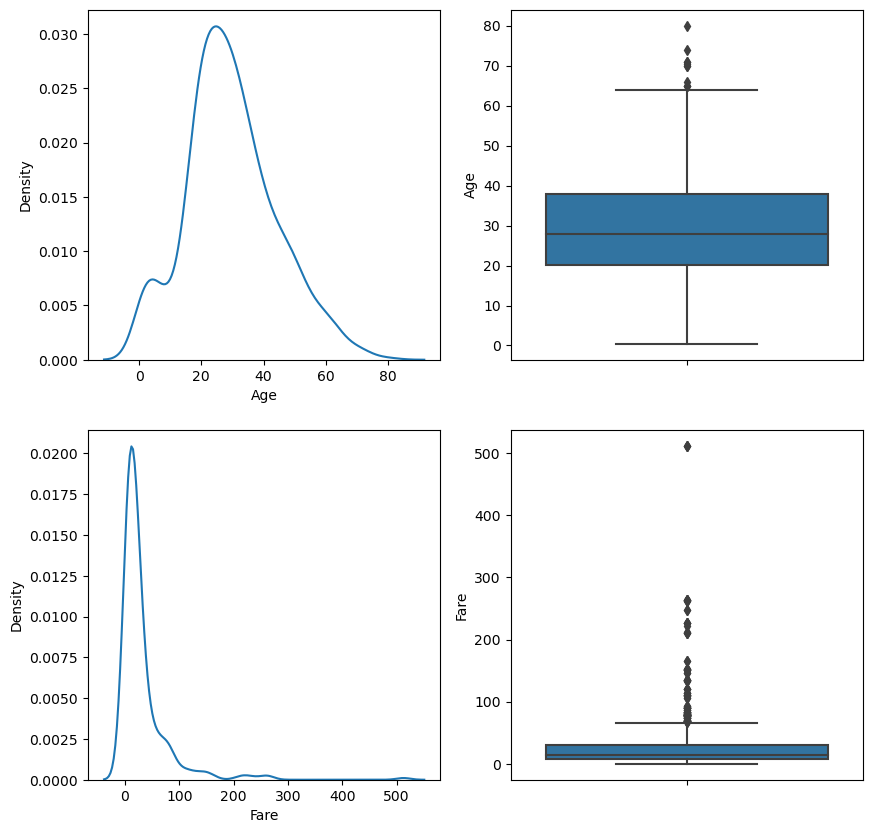

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data=titanic_df, x='Age')
plt.subplot(2,2,2)
sns.boxplot(data=titanic_df, y='Age')
plt.subplot(2,2,3)
sns.kdeplot(data=titanic_df, x='Fare')
plt.subplot(2,2,4)
sns.boxplot(data=titanic_df, y='Fare')

In [71]:
titanic_df[titanic_df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


## <b><span style='color:#595959'>|</span> Observations </b> 
* Age is normally distributed.
* Fare is highly skewed and it actully contains group fare not individual fare and also it has outliers.
<br>
* There are total 891 passenger most of them didn't survived(549 passenger died).
* Number of males is greater than female (577 male 314 female)
* Most of the passengers are travelling in pclass 3 (1-216,2-184,3-491)
* Most of the passenger are from Southampton (Southampton-644,Chebourg-168,Queenstoun-77)
* Most of the passengers are travelling alone.


## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 2-  Bivariative Analysis</mark>**

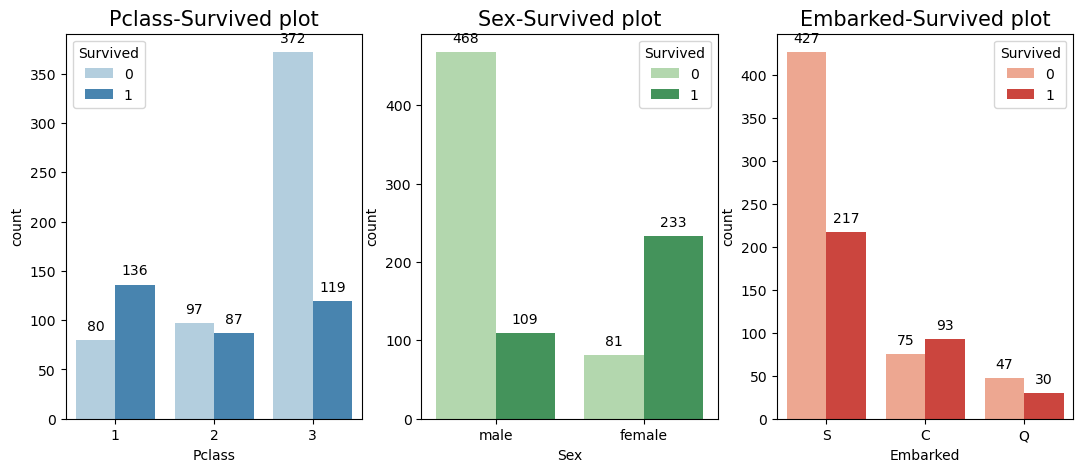

In [72]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Survived plot', size=15)
plot= sns.countplot(data=titanic_df, x='Pclass',hue='Survived' ,palette="Blues")
add_bar_labels(plot)

plt.subplot(1,3,2)
plt.title('Sex-Survived plot', size=15)
plot= sns.countplot(data=titanic_df, x='Sex', hue='Survived' ,palette="Greens")
add_bar_labels(plot)

plt.subplot(1,3,3)
plt.title('Embarked-Survived plot', size=15)
plot= sns.countplot(data=titanic_df, x='Embarked',hue='Survived' ,palette="Reds")
add_bar_labels(plot)


### feature engineering on sibsp and parch column

In [73]:
def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [74]:
titanic_df['family_type'] = titanic_df['family_size'].apply(transform_family_size)

In [75]:
titanic_df.drop(['SibSp','Parch'], axis=1,inplace=True)

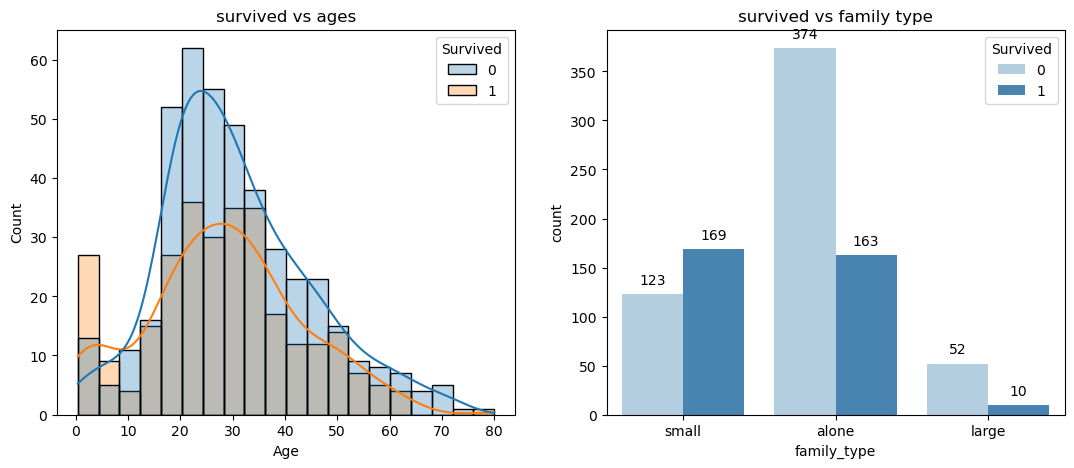

In [76]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('survived vs ages')
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True, bins=20,  alpha=0.3 );
plt.subplot(1,2,2)
plt.title('survived vs family type')
plot=sns.countplot(data=titanic_df, x='family_type', hue='Survived', palette='Blues')
add_bar_labels(plot)

In [77]:
survived_df=titanic_df[titanic_df['Survived'] == 1]
unsurvived_df=titanic_df[titanic_df['Survived'] == 0]
print('surviving male passengers \n')

print(survived_df[survived_df['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('surviving female passengers \n')

print(survived_df[survived_df['Sex']=='female'][['Age']].describe().T)

surviving male passengers 

     count       mean        std   min   25%   50%   75%   max
Age   93.0  27.276022  16.504803  0.42  18.0  28.0  36.0  80.0
--------------------------------
surviving female passengers 

     count       mean        std   min   25%   50%   75%   max
Age  197.0  28.847716  14.175073  0.75  19.0  28.0  38.0  63.0


In [78]:
print('non-surviving male passengers \n')

print(unsurvived_df[unsurvived_df['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('non-surviving female passengers \n')

print(unsurvived_df[unsurvived_df['Sex']=='female'][['Age']].describe().T)

non-surviving male passengers 

     count       mean        std  min    25%   50%    75%   max
Age  360.0  31.618056  14.056019  1.0  21.75  29.0  39.25  74.0
--------------------------------
non-surviving female passengers 

     count       mean        std  min    25%   50%    75%   max
Age   64.0  25.046875  13.618591  2.0  16.75  24.5  33.25  57.0


### Observation
* Chanses of suvival in p-class 1 is more then p-class 2 and p-class 3
* Female passengers had much better survival rate than males( 74.2% of female passengers survived but just 18.8% of males survived.)
<br><br>
* Port S had most passengers(630 passengers) but the most of them didn't survive (420 passengers not-survived about `67%`)
* Infant passengers (Age <=10) had high survival rate, about 70.4% of infant passengers survive
<br><br>
* Alon passengers has less survival rate(there are total 538 alone passengers travelling but most of them(374) were died)
* There is only one passengers with 80 years old and he is survived

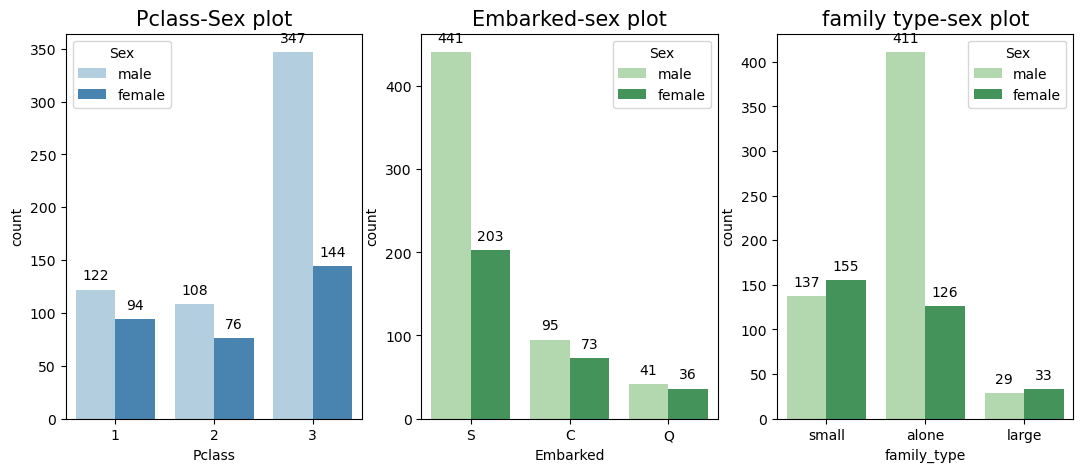

In [79]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Sex plot', size=15)
plot= sns.countplot(data=titanic_df, x='Pclass',hue='Sex' ,palette="Blues")
add_bar_labels(plot)
plt.subplot(1,3,2)
plt.title('Embarked-sex plot', size=15)
plot= sns.countplot(data=titanic_df, x='Embarked',hue='Sex' ,palette="Greens")
add_bar_labels(plot)
plt.subplot(1,3,3)
plt.title('family type-sex plot', size=15)
plot= sns.countplot(data=titanic_df, x='family_type',hue='Sex' ,palette="Greens")
add_bar_labels(plot)

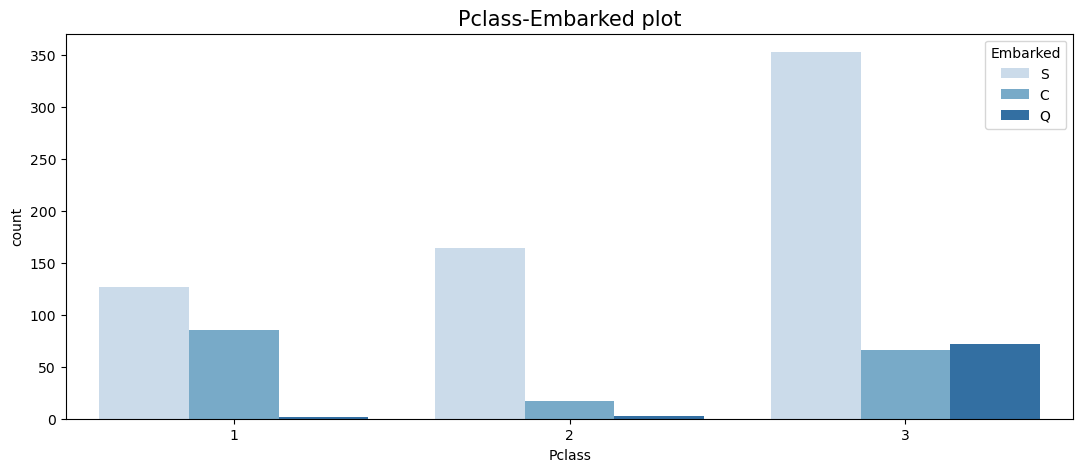

In [80]:
plt.figure(figsize=(13,5))
plt.title('Pclass-Embarked plot', size=15)
plot= sns.countplot(data=titanic_df, x='Pclass',hue='Embarked' ,palette="Blues")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


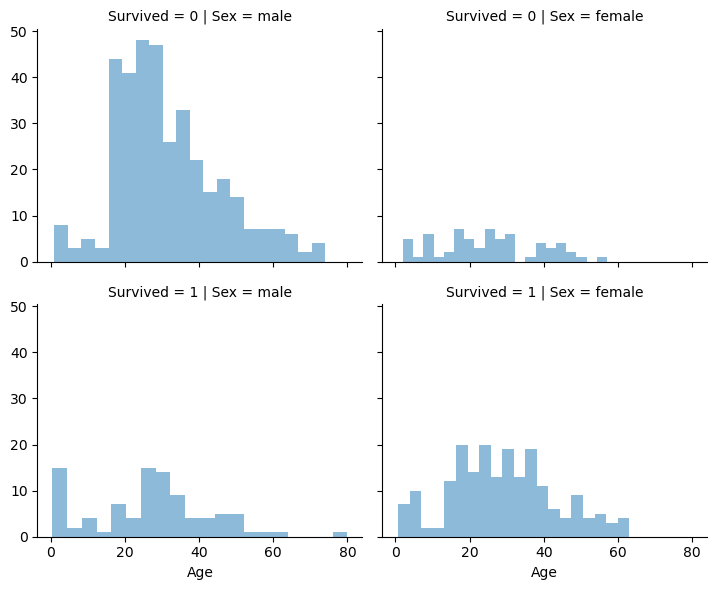

In [81]:
grid = sns.FacetGrid(titanic_df, col='Sex', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Observation
* Most male passengers aged 20-35 did not survive.
* Survival rate is low in pclass 3 becouse number of males is more in plcass 3.
* Most of the males are frome port-S and many of them are traveling in pclass 3.
* Survival rate of alone is low becouse most of the men are travelling alone and their mean age is 31.


## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 3- Multivariative Analysis</mark>**

<br>

## <b>I <span style='color:#595959'>|</span> Sex, Pclass and Embarked analysis </b> 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


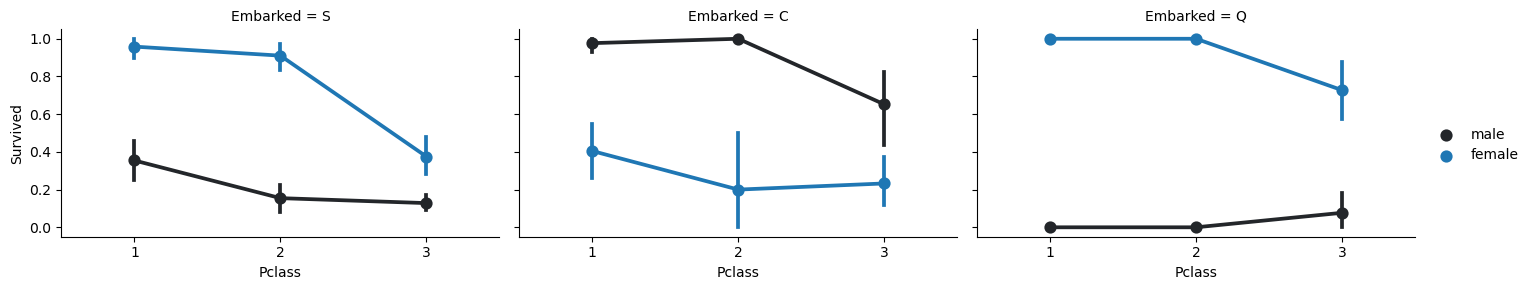

In [82]:
grid = sns.FacetGrid(titanic_df, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

## <b>II <span style='color:#595959'>|</span> Sex, Fare and Embarked analysis </b> 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-pack

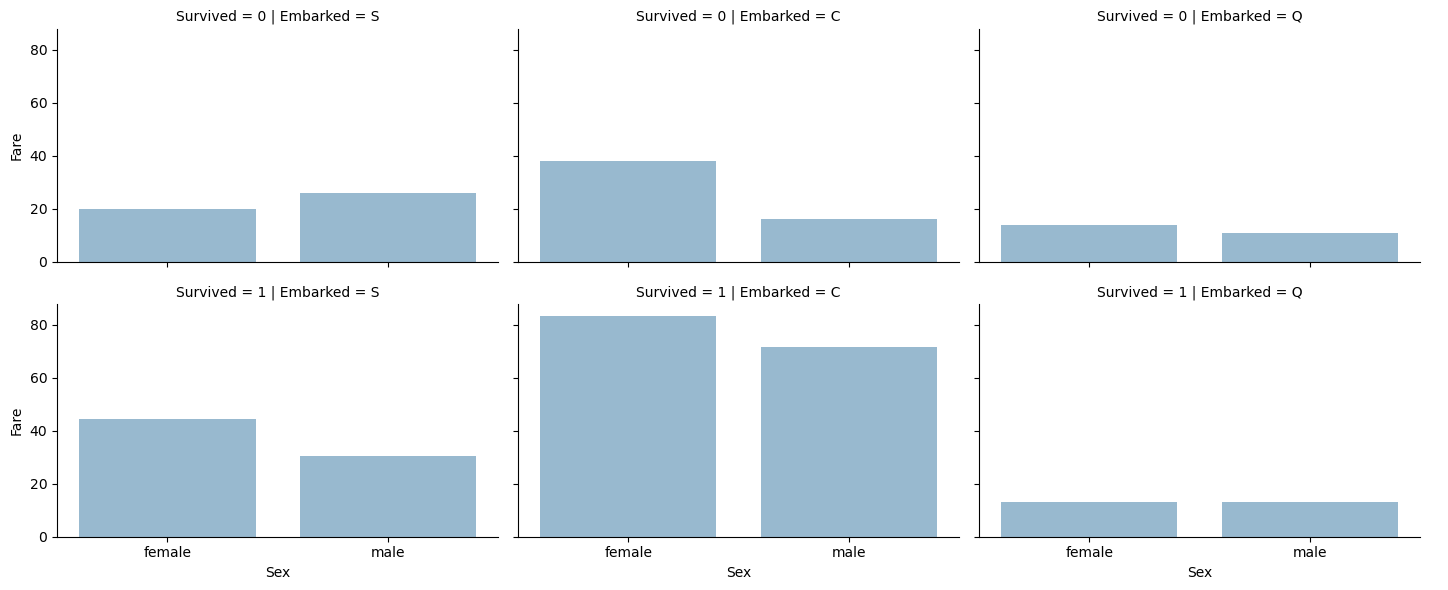

In [83]:
grid = sns.FacetGrid(titanic_df, col='Embarked', row='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

## <b><span style='color:#595959'>|</span> Observations </b> 

* Women on port Q and S have a higher chance of survival. But it's inverse at port C.

* Men have a high survival probability on port C, but a low probability on port Q or S.

* Most female passengers inside Pclass 3 on port C and S non-survived but most of them survived on port Q.
<br>
 
 
* Higher fare paying passengers had better survival. 

* Passengers on port Q paid less fare.

* Nearly no male survived on port Q. 

* Femals on port Q (about `37%` of all port Q passengers) Survived, however they paid small fare.



# <a id="4"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>3 | data preprocessing </span></b> </div>

<br>

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1-  Drop unuseful columns </mark>**
<br>

* Drop `PassengerId` column from the train set, because it won't beneficial

* Drop `Cabin` column, becouse 77% of its data are missing. And a general rule is that, if more than half of the data in a column is missing, it's better to drop it.

* Drop `Ticket` column, becouse there may not be a correlation between Ticket and survival and its high ratio of duplicates.

In [84]:
titanic_df.drop(columns='PassengerId', inplace=True)
titanic_df.drop(columns='Cabin', inplace=True)
titanic_df.drop(columns='Ticket', inplace=True)

## <b>I <span style='color:#595959'>|</span> Fare column</b> 

Frist we will check for missing values then we can create a new column name Individual_fare.

In [85]:
titanic_df['Fare'].isnull().sum()

0

In [86]:
titanic_df['Individual_fare'] = titanic_df['Fare']/titanic_df['family_size']

In [87]:
titanic_df[['Individual_fare','Fare']].describe()

,Individual_fare,Fare
count,891.000000,891.000000
mean,19.916375,32.204208
std,35.841257,49.693429
min,0.000000,0.000000
25%,7.250000,7.910400
50%,8.300000,14.454200
75%,23.666667,31.000000
max,512.329200,512.329200


## <b>II <span style='color:#595959'>|</span>Name column</b>

* First we will make new columns called `surname` and `title`.

In [88]:
titanic_df['Surname']=titanic_df['Name'].str.split(',').str.get(0)

In [89]:
titanic_df['title'] = titanic_df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [119]:
def replace_titles(x):
    title=x['title']
    
    if (x['Age']<13): return 'Boy'
    
    if title in ['Don.', 'Rev.', 'Col.','Capt.','Sir.','Major.','Jonkheer.','Mr','the','Master.']: return 'Mr.'
    
    elif title in ['Countess.', 'Mme.','Mrs']: return 'Mrs.'
    
    elif title in ['Mlle.', 'Ms.','Lady.','Dona.','Miss']: return 'Miss.'
    
    elif title =='Dr.':
        
        if x['Sex']=='male.': return 'Mr.'
        else: return 'Mrs.'
        
    else: return title

In [120]:
titanic_df['title']=titanic_df.apply(replace_titles,axis=1)

In [121]:
titanic_df['title'].value_counts()

Mr.      535
Miss.    154
Mrs.     133
Boy       69
Name: title, dtype: int64

In [123]:
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size,family_type,Individual_fare,Surname,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,small,3.62500,Braund,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,small,35.64165,Cumings,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,alone,7.92500,Heikkinen,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,small,26.55000,Futrelle,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,alone,8.05000,Allen,Mr.


<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you find this notebook useful, I really would appreciate your upvote!
   </span>
</div>